In [110]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
housing = fetch_california_housing()

In [112]:
#Training  and Testing Dataset
X_train_full,X_test,y_train_full , y_test = train_test_split(housing.data,housing.target)

#Validation Dataset
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [114]:
X_train_scaled[0]

array([ 0.28583131,  1.85505077, -0.31953077, -0.07790981,  0.09414008,
       -0.09446683,  1.00903856, -1.42778401])

In [115]:
y_test

array([2.581, 1.115, 2.821, ..., 1.715, 1.267, 0.882])

# Sequential APIs

In [116]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30,activation="relu",input_shape= X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

In [117]:
model.compile(loss='mean_squared_error',optimizer='sgd')
history = model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid_scaled,y_valid))
mse_test = model.evaluate(X_test_scaled,y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.7326 - val_loss: 0.5538
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5463 - val_loss: 0.6118
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5276 - val_loss: 0.7925
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5019 - val_loss: 0.4967
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5006 - val_loss: 0.4460
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4787 - val_loss: 0.4818
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4862
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4228 - val_loss: 0.5341
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4153 - val_loss: 0.5733
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4151 - val_loss: 0.6251

0.39191412925720215

In [118]:
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)

In [119]:
y_pred

array([[2.0607367],
       [1.639157 ],
       [3.1092637]], dtype=float32)

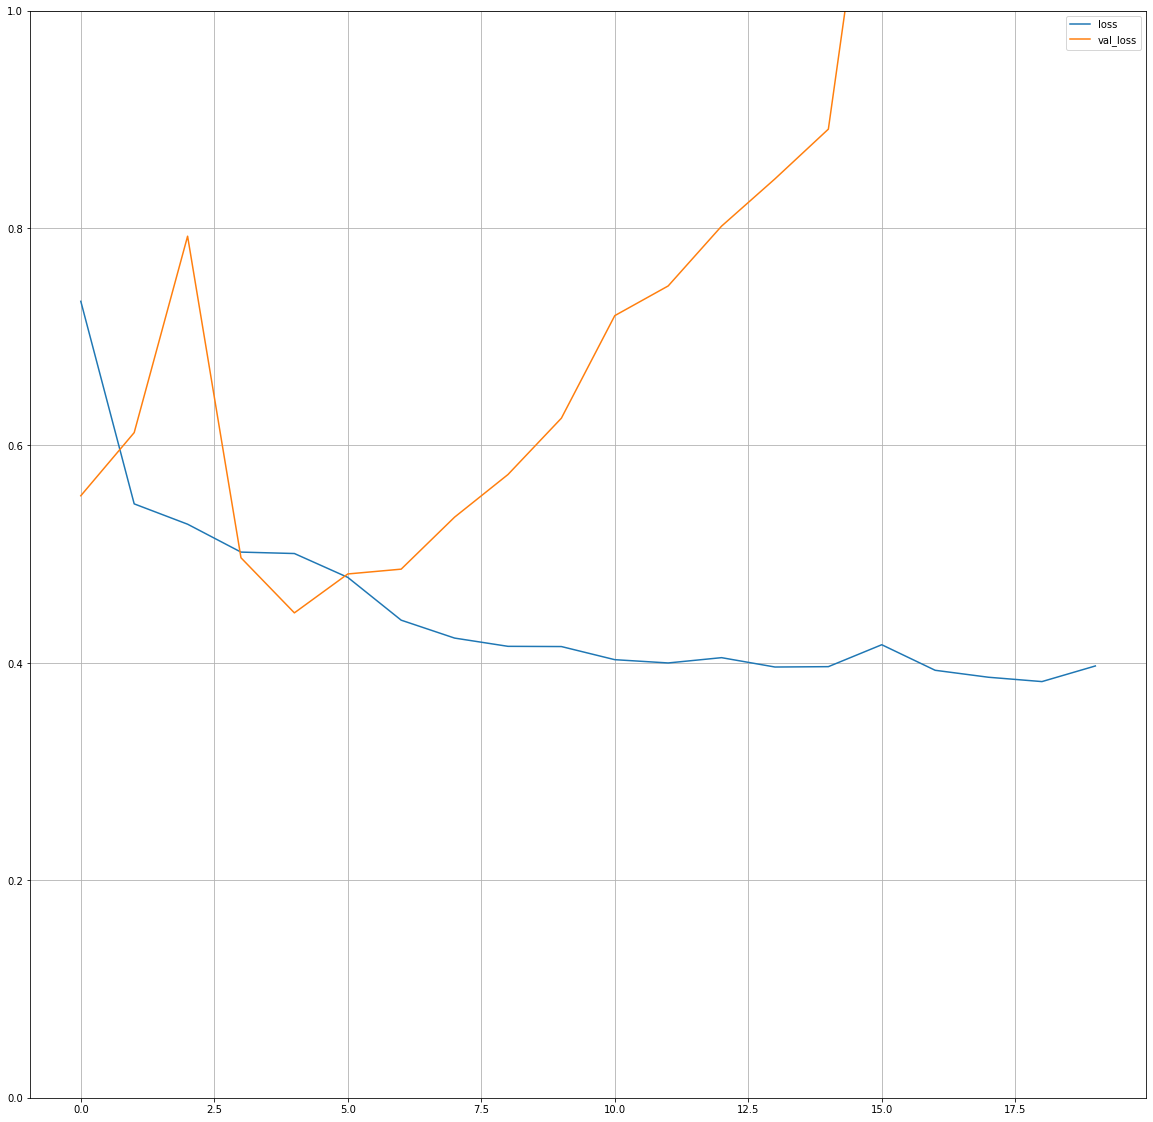

In [120]:
pd.DataFrame(history.history).plot(figsize=(20,20))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [121]:
y_test[:3]

array([2.581, 1.115, 2.821])

# Buiding Complex Models Using the Functional APIs



*   One example of a non-sequential neural network is a Wide & Deep neural network.
*   It connects all or part of the inputs directly to the output layer.


*   This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path). In
contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations.





In [122]:
#Neural Network to tackle the california Housing Problem

input = keras.layers. Input(shape=X_train_scaled.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input,hidden2])
output = keras.layers.Dense(1)(concat)
modelFunctionalAPIs = keras.models.Model(inputs=[input],outputs=[output])

In [123]:
modelFunctionalAPIs.compile(loss='mean_squared_error',optimizer='sgd')
history = modelFunctionalAPIs.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid_scaled,y_valid))
mse_test = modelFunctionalAPIs.evaluate(X_test_scaled,y_test)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.3112 - val_loss: 1.3119
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6799 - val_loss: 1.3842
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 3.5590 - val_loss: 0.7343
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5137 - val_loss: 0.4695
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4814 - val_loss: 0.4940
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4640 - val_loss: 0.5374
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7847 - val_loss: 0.5360
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4423 - val_loss: 0.5589
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4232 - val_loss: 0.6281
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4372 - val_loss: 0.7869

In [124]:
mse_test = modelFunctionalAPIs.evaluate(X_test_scaled,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3638


In [125]:
mse_test

0.36383286118507385

In [126]:
X_new = X_test_scaled[:3]
y_pred = modelFunctionalAPIs.predict(X_new)

In [127]:
y_pred

array([[2.0708585],
       [1.6253126],
       [3.329307 ]], dtype=float32)

In [128]:
y_test[:3]

array([2.581, 1.115, 2.821])

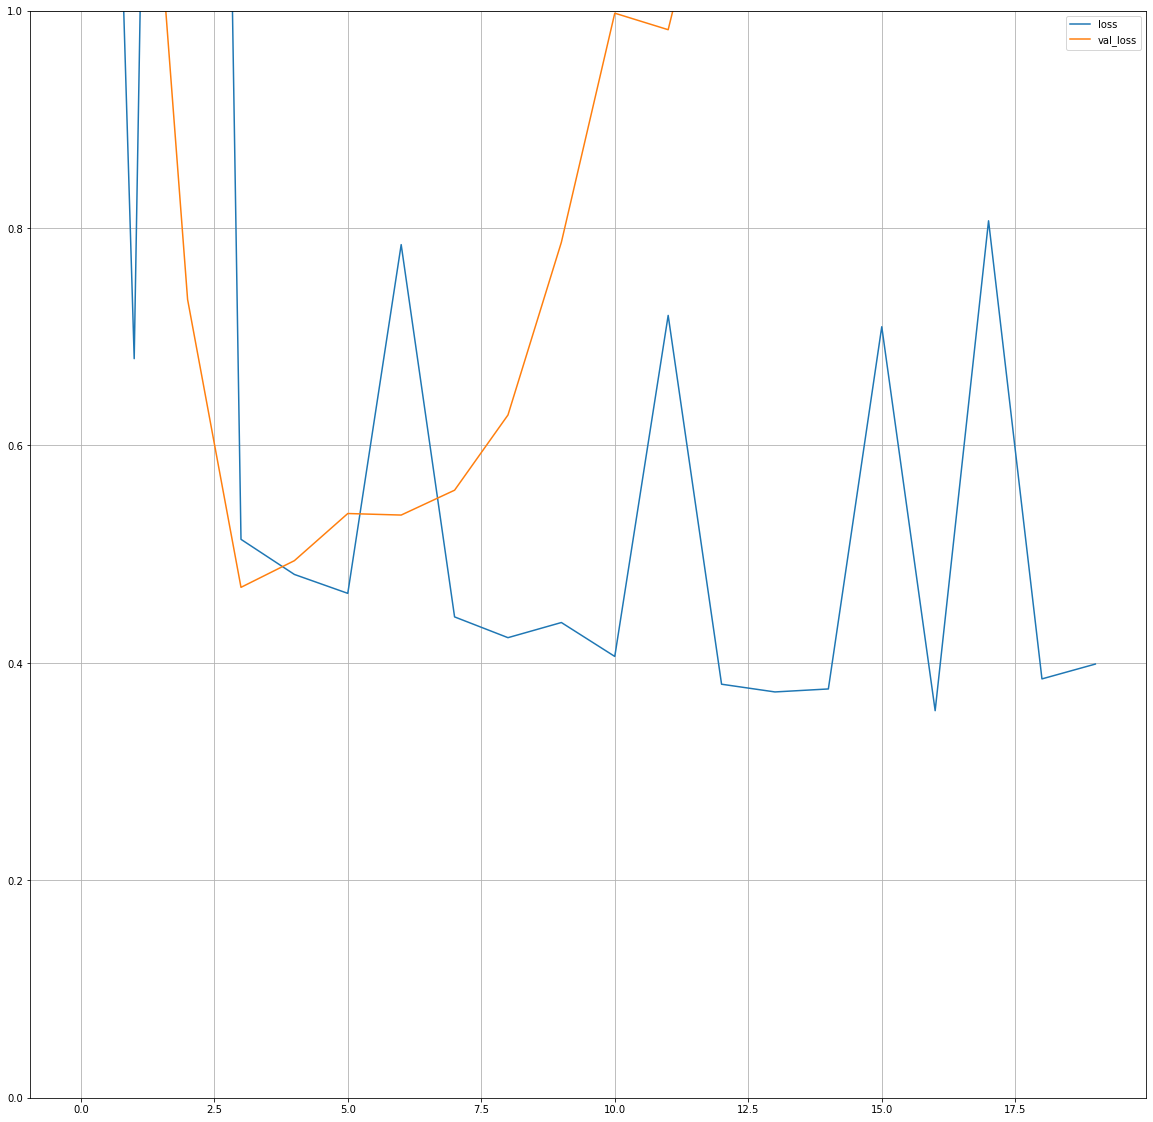

In [129]:
pd.DataFrame(history.history).plot(figsize=(20,20))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()



*   Suppose we want to send 5 features through the deep path(features 0 to 4) and 6 features through the widepath( features 2 to 7).



In [130]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A,input_B])
output = keras.layers.Dense(1)(concat)
model_TwoInputArchitecture = keras.models.Model(inputs=[input_A,input_B],outputs=[output])

In [131]:
model_TwoInputArchitecture.compile(loss='mean_squared_error',optimizer='sgd')

In [132]:
#Creating X_train for input A and input B 

X_train_A , X_train_B = X_train_scaled[:,:5] , X_train_scaled[:,2:]
X_valid_A , X_valid_B = X_valid_scaled[:,:5] , X_valid_scaled[:,2:]
X_test_A , X_test_B = X_test_scaled[:,:5] , X_test_scaled[:,2:]
X_new_A , X_new_B = X_test_A[:3] , X_test_B[:3]

In [133]:
history = model_TwoInputArchitecture.fit((X_train_A , X_train_B),y_train,epochs = 20, validation_data = ((X_valid_A,X_valid_B),y_valid))
mse_test = model_TwoInputArchitecture.evaluate((X_test_A,X_test_B),y_test)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.7975 - val_loss: 0.8116
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5807 - val_loss: 0.5246
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5970 - val_loss: 0.5367
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7908 - val_loss: 0.5100
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7530 - val_loss: 0.5102
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5703 - val_loss: 0.5858
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5979 - val_loss: 0.5105
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5919 - val_loss: 0.5301
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6488 - val_loss: 0.5426
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5435 - val_loss: 1.0406

In [134]:
y_pred = model_TwoInputArchitecture.predict((X_new_A,X_new_B))

In [135]:
y_pred

array([[1.7754459],
       [1.9637759],
       [3.0967722]], dtype=float32)

In [136]:
y_test[:3]

array([2.581, 1.115, 2.821])

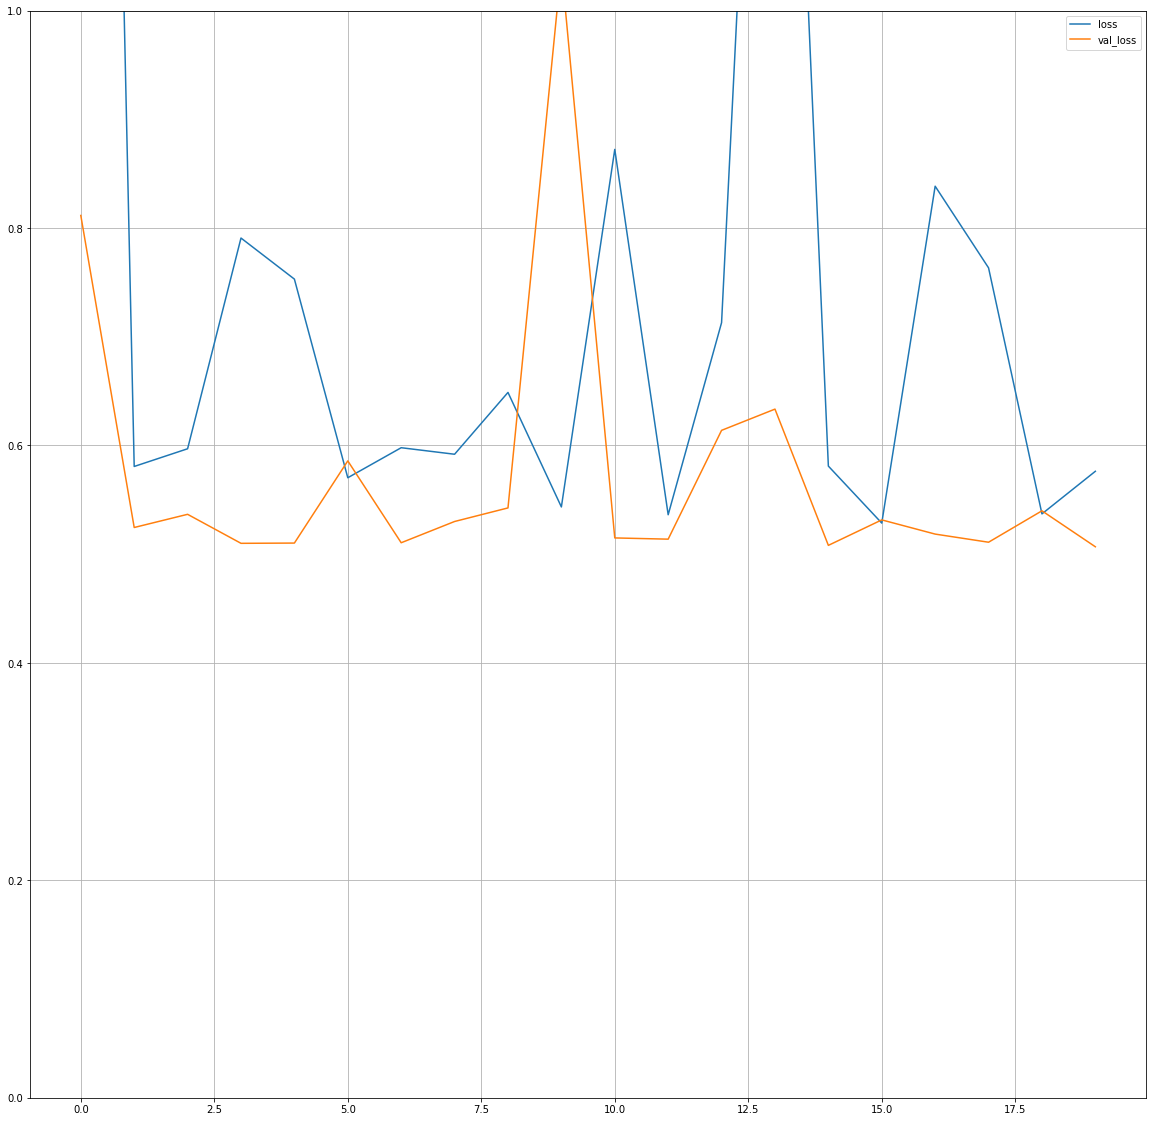

In [137]:
pd.DataFrame(history.history).plot(figsize=(20,20))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()



*   Use cases when we want to have multiple outputs



In [138]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A,input_B])
output = keras.layers.Dense(1)(concat)

aux_output = keras.layers.Dense(1)(hidden2)

model_MultipleInput_MultipleOutput = keras.models.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

Each output will need its own loss function, so when we compile the model we
should pass a list of losses (if we pass a single loss, Keras will assume that the same
loss must be used for all outputs). By default, Keras will compute all these losses and
simply add them up to get the final loss used for training. However, we care much
more about the main output than about the auxiliary output (as it is just used for reg‐
ularization), so we want to give the main output’s loss a much greater weight. Fortu‐
nately, it is possible to set all the loss weights when compiling the model

In [139]:
model_MultipleInput_MultipleOutput.compile(loss=["mse","mse"],loss_weights = [0.9,0.1],optimizer="sgd")

Now when we train the model, we need to provide some labels for each output. In
this example, the main output and the auxiliary output should try to predict the same
thing, so they should use the same labels. So instead of passing y_train , we just need
to pass (y_train, y_train) (and the same goes for y_valid and y_test )

In [140]:
history = model_MultipleInput_MultipleOutput.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data = ([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.1105 - dense_48_loss: 1.0018 - dense_49_loss: 2.0882 - val_loss: 0.5987 - val_dense_48_loss: 0.5156 - val_dense_49_loss: 1.3463
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6210 - dense_48_loss: 0.5411 - dense_49_loss: 1.3402 - val_loss: 0.5756 - val_dense_48_loss: 0.5124 - val_dense_49_loss: 1.1446
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7407 - dense_48_loss: 0.6903 - dense_49_loss: 1.1944 - val_loss: 0.5999 - val_dense_48_loss: 0.5523 - val_dense_49_loss: 1.0286
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6538 - dense_48_loss: 0.6061 - dense_49_loss: 1.0829 - val_loss: 0.5996 - val_dense_48_loss: 0.5618 - val_dense_49_loss: 0.9403
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9937 - dense_48_loss: 0.9949 - dense_49_loss: 0.9831 - val_loss: 0.5997 - val_dense_48_loss: 0.5694 - val_de

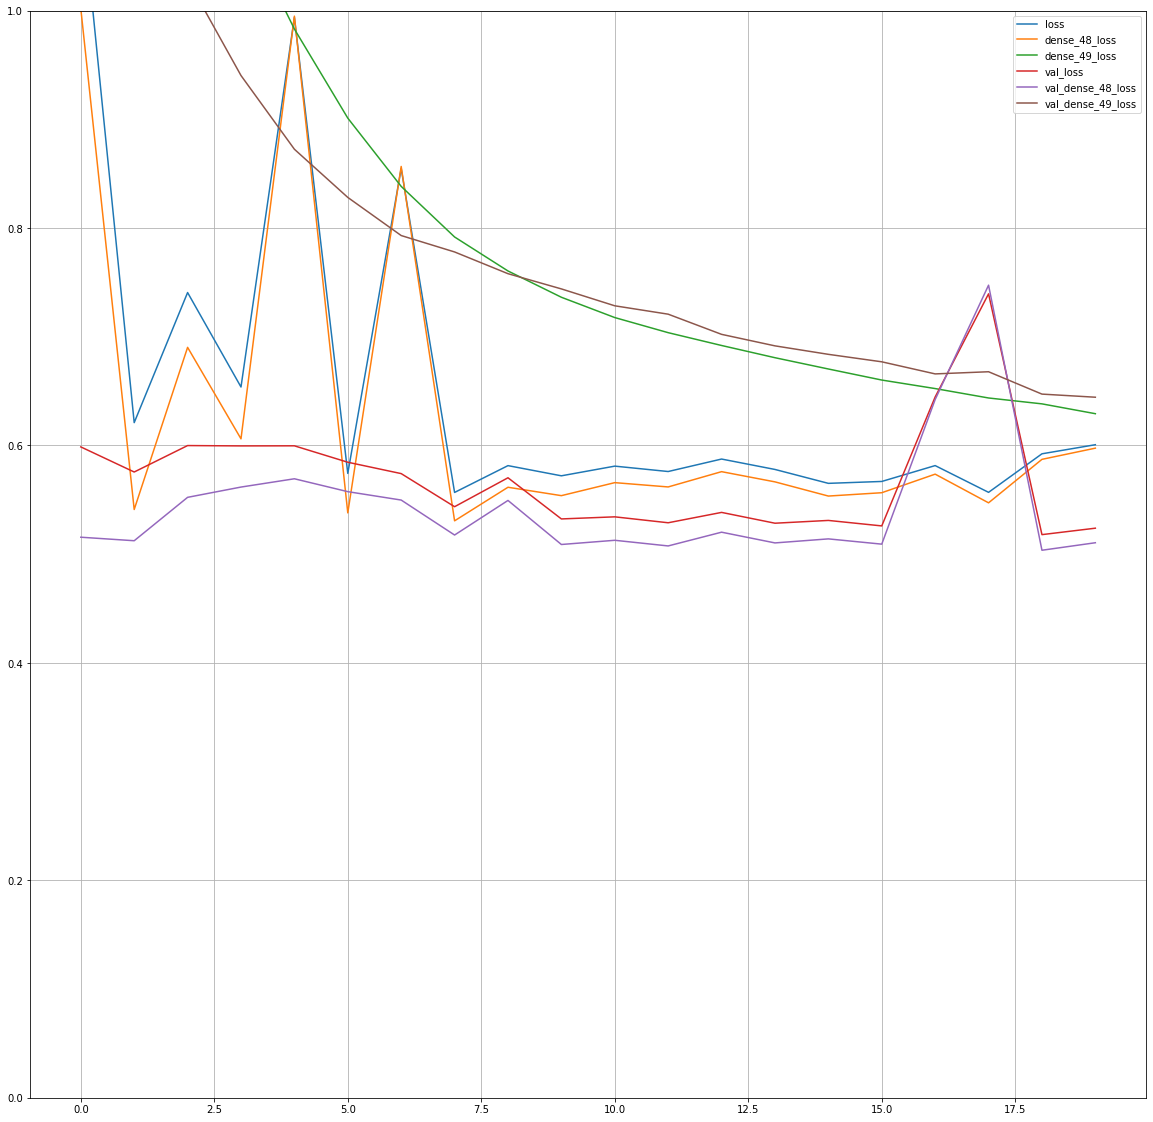

In [141]:
pd.DataFrame(history.history).plot(figsize=(20,20))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [85]:
total_loss , main_loss , aux_loss = model_MultipleInput_MultipleOutput.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 1s 4ms/step - loss: 0.5678 - dense_31_loss: 0.5470 - dense_32_loss: 0.7551


In [90]:
y_predict_main , y_predict_aux = model_MultipleInput_MultipleOutput.predict([X_new_A,X_new_B])

In [91]:
y_predict_main

array([[3.4277856],
       [1.5831938],
       [1.5345663]], dtype=float32)

In [92]:
y_predict_aux

array([[3.7241917 ],
       [1.2776294 ],
       [0.82828283]], dtype=float32)

# Building Dynamic Models using the SubClassing APIs

In [144]:
class WideAndDeepModel(keras.models.Model):
  def __init__(self,units=30,activation ="relu",**kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units,activation = activation)
    self.hidden2 = keras.layers.Dense(units, activation = activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
  
  def call(self,inputs):
    input_A , input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A,hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output 


In [148]:
model = WideAndDeepModel()
main_output , aux_output =model.call([X_train_A,X_train_B])

# Saving and Restoring a Model

In [149]:
model_MultipleInput_MultipleOutput.save("Keras_MultipleInput_MultipleOutput_Model.h5")

In [150]:
model = keras.models.load_model("Keras_MultipleInput_MultipleOutput_Model.h5")

The fit() method accepts a callbacks argument that lets you specify a list of objects
that Keras will call during training at the start and end of training, at the start and end
of each epoch and even before and after processing each batch. For example, the Mod
elCheckpoint callback saves checkpoints of your model at regular intervals during
training, by default at the end of each epoch

# Fine - Tuning Neural Network

One option is to simply try many combinations of hyperparameters and see which
one works best on the validation set (or using K-fold cross-validation). For this, one
approach is simply use GridSearchCV or RandomizedSearchCV to explore the hyper‐
parameter space.

we need to wrap our Keras models
in objects that mimic regular Scikit-Learn regressors. The first step is to create a func‐
tion that will build and compile a Keras model, given a set of hyperparameters

In [159]:
def build_model(n_hidden = 1, n_neurons = 30 , learning_rate = 3e-3,input_shape=[8]):
  model = keras.models.Sequential()
  options = {'input_shape':input_shape}
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons,activation="relu",**options))
    options = {}
  model.add(keras.layers.Dense(1,**options))
  optimizer = keras.optimizers.SGD(learning_rate)
  model.compile(loss="mse",optimizer = optimizer)
  return model

In [160]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [163]:
keras_reg.fit(X_train_scaled,y_train,epochs=100,validation_data = (X_valid_scaled,y_valid),callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test_scaled,y_test)
X_new = X_test_scaled[:3]
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3086 - val_loss: 0.5963
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6157 - val_loss: 0.5267
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5461 - val_loss: 0.4829
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5168 - val_loss: 0.4736
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4965 - val_loss: 0.4501
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4853 - val_loss: 0.4472
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4774 - val_loss: 0.4381
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4697 - val_loss: 0.4328
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4645 - val_loss: 0.4309
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4571 - val_lo

we do not actually want to train and evaluate a single model like this, we
want to train hundreds of variants and see which one performs best on the validation
set. Since there are many hyperparameters, it is preferable to use a randomized search
rather than grid search

In [172]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [173]:
param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4,3e-2)
}

In [174]:
rnd_search_cv = RandomizedSearchCV(keras_reg , param_distribs,n_iter = 10, cv =3)

In [175]:
rnd_search_cv.fit(X_train_scaled,y_train,epochs = 100 , validation_data = [X_valid_scaled,y_valid], callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 2s 6ms/step - loss: 1.6523 - val_loss: 0.5636
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5663 - val_loss: 1.0511
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 7.5985 - val_loss: 1.6545
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 12.9547 - val_loss: 3.0961
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 1.2415 - val_loss: 5.6410
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 2.0254 - val_loss: 10.0851
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 98.7173 - val_loss: 16.3628
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 153.0401 - val_loss: 32.5170
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 9.3271 - val_loss: 74.4452
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 719.400

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f32b60f78d0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f32b173ccd0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [176]:
rnd_search_cv.best_params_

{'learning_rate': 0.004346552135681469, 'n_hidden': 3, 'n_neurons': 28}

In [177]:
rnd_search_cv.best_score_

-0.3990927040576935

In [179]:
#Save the model
model = rnd_search_cv.best_estimator_.model

## Number of Hidden Layers



*   It has actually been shown that an MLP with just one hidden layer
can model even the most complex functions provided it has enough neurons.
*   For more complex problems, you can gradually ramp
up the number of hidden layers, until you start overfitting the training set. Very com‐
plex tasks, such as large image classification or speech recognition, typically require
networks with dozens of layers

## Number of Neurons per Hidden Layer



*   As for the hidden layers, it used to be a common practice to size them to form a pyra‐
mid, with fewer and fewer neurons at each layer—the rationale being that many low-
level features can coalesce into far fewer high-level features.
*   However, this practice has been largely
abandoned now, as it seems that simply using the same number of neurons in all hid‐
den layers performs just as well in most cases, or even better, and there is just one
hyperparameter to tune instead of one per layer—for example, all hidden layers could
simply have 150 neurons.
 However, depending on the dataset, it can sometimes help
to make the first hidden layer bigger than the others


*   A simpler approach is to pick a model with more layers and neurons than you
actually need, then use early stopping to prevent it from overfitting

## Learning Rate , Batch Size and other HyperParameters



*   The optimal learning rate is about half of the maximum learning rate(learning rate above which the training algorithm diverges).
*   So
a simple approach for tuning the learning rate is to start with a large value that
makes the training algorithm diverge, then divide this value by 3 and try again,
and repeat until the training algorithm stops diverging. At that point, you gener‐
ally won’t be too far from the optimal learning rate.



*   In general the optimal batch size will be lower than 32 (in
April 2018, Yann Lecun even tweeted "Friends don’t let friends use mini-batches
larger than 32“).
*   In general the optimal batch size will be lower than 32 (in
April 2018, Yann Lecun even tweeted "Friends don’t let friends use mini-batches
larger than 32“).



*   the ReLU activation function will be a good default for all hidden layers
*   In most cases, the number of training iterations does not actually need to be
tweaked: just use early stopping instead.













